# Tests & Confirmed Over Time

In [12]:
# Enable Intellisense
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np
import io
import requests
import seaborn as sns
from matplotlib import pyplot, dates
import plotly.express as px 
import datetime
import plotly.graph_objects as go
import plotly.io as pio
sns.set()

In [13]:
tests_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_testing.csv"
confirm_data_url = "https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_confirmed.csv"

tests_data_req = requests.get(tests_data_url).content
confirm_data_req = requests.get(confirm_data_url).content

tests_data = pd.read_csv(io.StringIO(tests_data_req.decode('utf-8')), delimiter = ',')
confirmed_data = pd.read_csv(io.StringIO(confirm_data_req.decode('utf-8')), delimiter = ',')

In [14]:
tests_data = pd.read_csv('data/tests_data.csv')

In [15]:
tests_data = tests_data[['date','cumulative_tests']]
confirmed_data = confirmed_data[['date']]

### tests_data

In [16]:
tests_data.tail()

,date,cumulative_tests
18,18-03-2020,3070
19,19-03-2020,4832
20,20-03-2020,6438
21,21-03-2020,7425
22,22-03-2020,9315


In [17]:
tests_data['date'] = pd.to_datetime(tests_data['date'], format='%d-%m-%Y')
tests_data.set_index('date', inplace = True)
tests_data

,cumulative_tests
date,
2020-02-11,61
2020-02-13,67
2020-02-14,71
2020-02-19,95
2020-02-20,106
2020-02-24,116
2020-02-26,121
2020-03-02,160
2020-03-03,164


### confirmed_data

In [18]:
confirmed_data.tail()

,date
269,22-03-2020
270,22-03-2020
271,22-03-2020
272,22-03-2020
273,22-03-2020


In [19]:
confirmed_data['date'] = pd.to_datetime(confirmed_data['date'], format='%d-%m-%Y')
confirmed_nos_data = pd.DataFrame(confirmed_data.groupby('date')['date'].count())
confirmed_nos_data.head()

,date
date,
2020-03-05,1
2020-03-07,1
2020-03-08,1
2020-03-09,4
2020-03-11,6


#### Confirmed Daily Cases

In [20]:
confirmed_nos_data.rename(columns={"date":"daily_cases"}, inplace = True)
confirmed_nos_data

,daily_cases
date,
2020-03-05,1
2020-03-07,1
2020-03-08,1
2020-03-09,4
2020-03-11,6
2020-03-12,3
2020-03-13,8
2020-03-14,14
2020-03-15,13


In [21]:
daily_cases_df = confirmed_nos_data.reset_index()

fig_daily_cases = px.line(daily_cases_df, x='date', y='daily_cases',)

fig_daily_cases.update_layout(
    title="",
    xaxis_title="Date",
    yaxis_title="Daily Cases",
    hovermode= 'x',
    legend=dict(x=0.01, y=.98),
    xaxis=dict(fixedrange=True),
    yaxis=dict(fixedrange=True),
)

fig_daily_cases.update_traces(line = {'color': 'firebrick', 'dash': 'solid'})
# fig_daily_cases.data[0].update_trace()
# line = {'color': '#636efa', 'dash': 'solid'}

# Point markers
fig_daily_cases.add_trace(go.Scatter(x=daily_cases_df['date'], y=daily_cases_df['daily_cases'],
                                     mode='markers', hoverinfo='skip',
                        marker=dict(color='firebrick'), showlegend = False))

# fig_daily_cases.data[0].name = "Daily Positive Cases"

fig_daily_cases.data[0].hovertemplate = '%{y}'
fig_daily_cases.show(config = dict(displayModeBar=False))

In [22]:
pio.write_html(fig_daily_cases, file='date_vs_daily_cases.html',
               config = dict(displayModeBar=False), auto_open=True)

#### Cumulative Confirmed Cases and Tests Performed

In [23]:
confirmed_nos_data['cum_cases']=confirmed_nos_data['daily_cases'].cumsum()
confirmed_nos_data

,daily_cases,cum_cases
date,,
2020-03-05,1,1
2020-03-07,1,2
2020-03-08,1,3
2020-03-09,4,7
2020-03-11,6,13
2020-03-12,3,16
2020-03-13,8,24
2020-03-14,14,38
2020-03-15,13,51


## Tested Vs Confirmed

In [24]:
confirmed_nos_data

,daily_cases,cum_cases
date,,
2020-03-05,1,1
2020-03-07,1,2
2020-03-08,1,3
2020-03-09,4,7
2020-03-11,6,13
2020-03-12,3,16
2020-03-13,8,24
2020-03-14,14,38
2020-03-15,13,51


In [25]:
tests_confirmed_data = pd.concat([tests_data, confirmed_nos_data[['cum_cases']]], axis =1)
tests_confirmed_data

,cumulative_tests,cum_cases
date,,
2020-02-11,61.0,NaN
2020-02-13,67.0,NaN
2020-02-14,71.0,NaN
2020-02-19,95.0,NaN
2020-02-20,106.0,NaN
2020-02-24,116.0,NaN
2020-02-26,121.0,NaN
2020-03-02,160.0,NaN
2020-03-03,164.0,NaN


In [26]:
tests_confirmed_data.fillna(method='ffill', inplace=True)
tests_confirmed_data

,cumulative_tests,cum_cases
date,,
2020-02-11,61.0,NaN
2020-02-13,67.0,NaN
2020-02-14,71.0,NaN
2020-02-19,95.0,NaN
2020-02-20,106.0,NaN
2020-02-24,116.0,NaN
2020-02-26,121.0,NaN
2020-03-02,160.0,NaN
2020-03-03,164.0,NaN


In [27]:
tests_confirmed_data.dropna(inplace=True)
tests_confirmed_data

,cumulative_tests,cum_cases
date,,
2020-03-05,164.0,1.0
2020-03-06,200.0,1.0
2020-03-07,241.0,2.0
2020-03-08,241.0,3.0
2020-03-09,241.0,7.0
2020-03-11,645.0,13.0
2020-03-12,848.0,16.0
2020-03-13,924.0,24.0
2020-03-14,1017.0,38.0


In [28]:
tests_confirmed_data.to_csv("data/tests_vs_confirmed.csv")

## Visualisations
### Cumulative Cases Vs Cumulative Tests

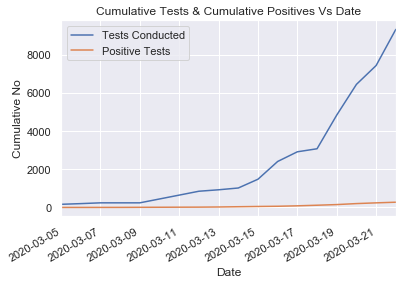

In [29]:
tests_confirmed_data['cumulative_tests'].plot()
p = tests_confirmed_data['cum_cases'].plot()
p.legend(loc='upper left', bbox_to_anchor=(0,1), labels=['Tests Conducted','Positive Tests'])
p.set_title('Cumulative Tests & Cumulative Positives Vs Date')
p.set_ylabel('Cumulative No')
p.set_xlabel('Date')
import matplotlib.pyplot as plt

### Interactive Plot

In [30]:
df_wide = tests_confirmed_data.copy()
df_wide.reset_index(inplace=True)

In [45]:
df_long = pd.melt(df_wide, id_vars=['date'], value_vars=['cumulative_tests','cum_cases'])
fig = px.line(df_long, x='date', y='value', color='variable')

fig.update_layout(
    title="",
    xaxis_title="Date",
    yaxis_title="Cumulative No",
    hovermode= 'x',
    legend=dict(x=0.01, y=.98),
    xaxis=dict(fixedrange=True),
    yaxis=dict(fixedrange=True),
)

# Point markers
fig.add_trace(go.Scatter(x=df_wide['date'], y=df_wide['cumulative_tests'],mode='markers', hoverinfo='skip',
                        marker=dict(color='blue'), showlegend = False))

fig.add_trace(go.Scatter(x=df_wide['date'], y=df_wide['cum_cases'],mode='markers', hoverinfo='skip',
                        marker=dict(color='firebrick'), showlegend = False))

fig.data[0].name = "Daily Tests"
fig.data[1].name = "Daily Positive Cases"

fig.data[0].hovertemplate = '%{y}'
fig.data[1].hovertemplate = '%{y}'
fig.show(config = dict(displayModeBar=False))

#### Save plot to HTML

In [32]:
import plotly.io as pio
pio.write_html(fig, file='date_vs_cases_tests.html',config = dict(displayModeBar=False), auto_open=True)

##  Only confirmed cases over time
// TODO: Add trend line

In [33]:
df_wide_confirm = tests_confirmed_data.copy()
df_wide_confirm.reset_index(inplace=True)

df_long_confirm = pd.melt(df_wide_confirm, id_vars=['date'], value_vars=['cum_cases'])
fig_confirm = px.line(df_long_confirm, x='date', y='value', color='variable',
                     color_discrete_map={"cum_cases": "firebrick"}
                     )

fig_confirm.update_layout(
    title="",
    xaxis_title="Date",
    yaxis_title="Cumulative No",
    hovermode= 'x',
    legend=dict(x=0.01, y=.98),
    xaxis=dict(fixedrange=True),
    yaxis=dict(fixedrange=True),
)

# Point markers
fig_confirm.add_trace(go.Scatter(x=df_wide['date'], y=df_wide['cum_cases'],mode='markers', hoverinfo='skip',
                        marker=dict(color='firebrick'), showlegend = False))

fig_confirm.data[0].name = "Daily Positive Cases"

fig_confirm.data[0].hovertemplate = '%{y}'
fig_confirm.show(config = dict(displayModeBar=False))

In [34]:
pio.write_html(fig_confirm, file='date_vs_cases.html',config = dict(displayModeBar=False), auto_open=True)

### Cases over time per province

In [35]:
prov_cases = pd.read_csv(io.StringIO(confirm_data_req.decode('utf-8')), delimiter = ',',
                                  usecols=['date','province'])
prov_cases['date'] = pd.to_datetime(prov_cases['date'], format='%d-%m-%Y')
prov_cases['count'] = 1
prov_cases.head()

,date,province,count
0,2020-03-05,KZN,1
1,2020-03-07,GP,1
2,2020-03-08,KZN,1
3,2020-03-09,KZN,1
4,2020-03-09,KZN,1


In [36]:
province_names = {"EC":"Eastern Cape",
                     "FS" : "Free State",
                     "GP" : "Gauteng",
                     "KZN" : "KwaZula-Natal",
                     "LP" : "Limpopo",
                     "MP" : "Mpumalanga",
                     "NW" : "North West",
                     "NC" : "Northern Cape",
                     "WC" : "Western Cape"}
prov_cases['province'] = prov_cases['province'].map(province_names)
prov_cases.tail()

,date,province,count
269,2020-03-22,Western Cape,1
270,2020-03-22,Western Cape,1
271,2020-03-22,Western Cape,1
272,2020-03-22,Western Cape,1
273,2020-03-22,Western Cape,1


In [37]:
# province_names.values
sum_count = 0
for val in list(province_names.values()):
        count = prov_cases[prov_cases['province']==val]['count'].sum()
        print(val +  " " + str(count))
        sum_count += count
print("Sum: ", sum_count)
# print(prov_cases[prov_cases['province']=='Western Cape']['count'].sum())
# print(prov_cases[prov_cases['province']=='Gauteng']['count'].sum())

Eastern Cape 2
Free State 9
Gauteng 132
KwaZula-Natal 35
Limpopo 2
Mpumalanga 5
North West 0
Northern Cape 0
Western Cape 89
Sum:  274


* KZN - 36
* LP - 1
* MP - 6
* WC - 88

In [38]:
prov_cases_group = prov_cases.groupby(['date','province']).sum()

In [39]:
prov_cases_group['cum_sum'] =  prov_cases_group.groupby('province').cumsum()['count']
prov_cases_group

count  cum_sum
date       province                     
2020-03-05 KwaZula-Natal      1        1
2020-03-07 Gauteng            1        1
2020-03-08 KwaZula-Natal      1        2
2020-03-09 KwaZula-Natal      4        6
2020-03-11 Gauteng            4        5
           KwaZula-Natal      1        7
           Western Cape       1        1
2020-03-12 Gauteng            1        6
           KwaZula-Natal      1        8
           Mpumalanga         1        1
2020-03-13 Gauteng            4       10
           KwaZula-Natal      2       10
           Western Cape       2        3
2020-03-14 Gauteng            7       17
           KwaZula-Natal      1       11
           Western Cape       6        9
2020-03-15 Gauteng            7       24
           KwaZula-Natal      1       12
           Western Cape       5       14
2020-03-16 Gauteng            7       31
           Limpopo            1        1
           Mpumalanga         1        2
           Western Cape       2       16
2020-03-17 Gauteng           14       45
           KwaZula-Natal      4       16
           Western Cape       5       21
2020-03-18 Gauteng           16       61
           KwaZula-Natal      3       19
           Mpumalanga         2        4
           Western Cape      10       31
2020-03-19 Gauteng           15       76
           KwaZula-Natal      3       22
           Mpumalanga         1        5
           Western Cape      15       46
2020-03-20 Free State         7        7
           Gauteng           33      109
           KwaZula-Natal      1       23
           Western Cape      11       57
2020-03-21 Eastern Cape       1        1
           Gauteng           16      125
           KwaZula-Natal      3       26
           Western Cape      18       75
2020-03-22 Eastern Cape       1        2
           Free State         2        9
           Gauteng            7      132
           KwaZula-Natal      9       35
           Limpopo            1        2
           Western Cape      14       89

In [40]:
# province_names.values
sum_count = 0
for val in list(province_names.values()):
        count = prov_cases[prov_cases['province']==val]['count'].sum()
        print(val +  " " + str(count))
        sum_count += count
print("Sum: ", sum_count)
# print(prov_cases[prov_cases['province']=='Western Cape']['count'].sum())
# print(prov_cases[prov_cases['province']=='Gauteng']['count'].sum())

Eastern Cape 2
Free State 9
Gauteng 132
KwaZula-Natal 35
Limpopo 2
Mpumalanga 5
North West 0
Northern Cape 0
Western Cape 89
Sum:  274


In [41]:
prov_cases_group.reset_index(inplace=True)
prov_cases_group.tail()

,date,province,count,cum_sum
43,2020-03-22,Free State,2,9
44,2020-03-22,Gauteng,7,132
45,2020-03-22,KwaZula-Natal,9,35
46,2020-03-22,Limpopo,1,2
47,2020-03-22,Western Cape,14,89


In [42]:
fig_prov_cases = px.line(prov_cases_group, x='date', y='cum_sum', color='province',hover_data=['province'])

fig_prov_cases.update_layout(
    title="",
    xaxis_title="Date",
    yaxis_title="Cumulative No",
    hovermode= 'x',
    legend=dict(x=0.01, y=.98),
    xaxis=dict(fixedrange=True),
    yaxis=dict(fixedrange=True),

)

for d in fig_prov_cases.data:
    d.hoverinfo = 'all',
    d.hovertemplate = '%{customdata[0]}<br>%{y}'
    d.name = d.name[9:]
fig_prov_cases.show(config = dict(displayModeBar=False))

In [43]:
pio.write_html(fig_prov_cases, file='date_vs_cases_per_province.html',
               config = dict(displayModeBar=False), auto_open=True)